# Frequências
Este notebook é parte da documentação de uma exploração de dados realizada para o artigo _**O uso da Cloroquina no tratamento da Covid-19 debatido no Facebook**: um estudo em opinião pública com processamento de linguagem natural_.

A análise de frequências é parte de métodos já clássicos da análise de conteúdo. Basicamente levanta quantas vezes um dado termo ou expressão aparece no texto.

## Importando e lendo os dados
Serão usados os mesmos arquivos que serviram de base para a composição das nuvens de palavras.

In [1]:
# montando o Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Caminho dos arquivos
!ls '/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo'

content1.csv  content3.csv  content5.csv  content7.csv
content2.csv  content4.csv  content6.csv


In [4]:
# Abrindo todos os sete datasets
data1 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content1.csv')
data2 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content2.csv')
data3 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content3.csv')
data4 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content4.csv')
data5 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content5.csv')
data6 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content6.csv')
data7 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content7.csv')

# lendo...
data1 = data1.read()
data2 = data2.read()
data3 = data3.read()
data4 = data4.read()
data5 = data5.read()
data6 = data6.read()
data7 = data7.read()

## Tratamento do texto
A nuvem de palavras levanta a frequência dos termos, mas de um modo gráfico. Aqui vamos fazer de um modo estatístico usando a função _word_counts_ do TextBlob. Começamos importando [TextBlob](https://textblob.readthedocs.io/en/dev/), [NLTK](http://www.nltk.org/) e complementos. Coloco aqui também a minha lista personalizada de stopwords, gerada para as nuvens.

In [5]:
# importando bibliotecas
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('punkt')            # isso aqui lida com sinais de pontuação

# stopwords personalizadas (aproveitando para remover uns lixos)
stop = ['a1-tomando-hidroxicloroquina/a-53490069', 'maca=pt-br-facebook-sharing', '…ver', '21.05.2020', 'el', 'la', '1a', 'id=111037913835511', 'story_fbid=142404497365519', 'angu…ver', 'cartacapital.com.br', '83', '0:08', '‎‎9', 'rfi', '2:15', '‎11:13', 'مه', '79', 'dp', '6:20', '0:29', '05/06/2020', 'A1rmaco-contra-la-malaria-para-combatir-el-coronavirus/a-53525047', '28x', '55', 'pessoa…ver', 'salvado…ver', 'rebanho…ver', 'revistagalileu.globo.com', '22:45', '000', '2comentários', '2:33', '5x', '×', 'messeng…ver', '23:19', 'usoalideatdatr.coacmacegamos', 'rob…ver', 'derivados.…ver', '35.000', 'nã…ver', 'n', '1,5', 'cr', '90.000', '19', 'td', 'veja.abril.com.br', '90', 'not', '7:12', '20_05_2020', 'consultaremedios.com.br', 'id=636938300054720', 'story_fbid=1019342698480943', 'b', '25a3o-de-casos-de-covid-19-1.424102', '25ADcias/geral/eua-passa-de-90-000-mortes-e-1-5-milh%25C3%25A3o-de-casos-de-covid-19-1.424102%3famp=1', 'correiodopovo.com.br', 'ciencia.estadao.com.br', 'utm_medium=link', '3afacebook', '30', '6', 'utm_source=estadao', 'it', 'id=100003639170871', 'story_fbid=1870871703044117', 'http://www.gazetadopovo.com.br/republica/breves/coronavirus-sociedade-brasileira-imunologia-cloroquina', 'gazetadopovo.com.br', 'dailymail.co.uk', '1…ver', '14', '508', 'w', '400', 'c3', 'v=uijcuwvardy', 'entã…ver', '16', '96000', 'https://www.medrxiv.org/content/10.1101/2020.04.07.20056424v2', 'feature=youtu.be', 'v=vmdyiiidml8', '68', '08', 'media1.tenor.co', 'necessit…ver', 'giphy', 'es', 'unicamp.br', 't', 'id=100000982583520', 'story_fbid=3937748652934515', 'www1.folha.uol.com.br', 'correiobraziliense.com.br', 'maca=pt-br-facebook-sharing', '12:53', '94', '99', 'l…ver', 'lamarque/reuters', '1.000', 'd3', 'g1.globo.com', 'a1-tomando-hidroxicloroquina/a-53490069', '70', '01:29', '01:30', '8', 'n', '11', 'fbclid=IwAR00ntGTutiH3TOgQA18xBFpHmMnMKQ4CeGORpPYRwnYqe4-z-7sBACkS4w', 'v=imyfz7ri8vc', 'v=zer6omw0vnu', '2002', 'v=wa2om70v66o', 'x', 'ufpr.br', '11.°', '14', 'luciliadiniz.com', '11:56', '348', '428', 'ea', '15', 'médicosrevistacrescer.globo.com', 'pel…', 'saude.estadao.com.br', 'qq', 'di…ver', 'di…ver', 'vi…ver', '67', 'infart…ver', 'acredita…ver	', 'q…ver', 'a…ver', 'chat.whatsapp.com', '500mg', '450', '90', '200mg', 'e…ver', '30', 'n9', 'ñ', 'c', 'tb', '30', 'i', '07/04', '24', 'and', 'so', '’', '‘', '500', 'at', 'id=100031212156711', 'story_fbid=241150380268699', '03', '13/03/2020', '2/2', '25876', '01441', '2000', '5.000', 'the', '23:11', 'www.google.com', '21:35', 'ii', 'mg/kg', 'qd', '’', 'so', 'c', 'est', '»', 'noticias.r7.com', 'he', '19', 'www1.folha.uol.com.br', '23:22', '24', 'bloomberg.com', 'co…', 'google.com', 'to', 'is', 'it', 'oh', '川', '5:27', 'neh', 'brasil.elpais.com	', 'afff', '3foutputtype=amp', '36', '90', '400', 'c', '🥱', 'tô', 'mi', 'rs', 'correiobraziliense.com.br', 'r', 'agr', 'ô', '819', 'pre', '19', 'uai', '14', 'so', 'twitch.tv', '13', '2003', 'afz', 'hein', '35', 'media1.tenor.co', 'á', 'giphy', 'g1.globo.com', 'b382022', '2,5', '18.000.00', 'epoca.globo.com', 'veja.abril.com.br', 'id=100002238746462', 'story_fbid=3034985226586072', 'ê', 'o', 'aff', '39', '16', 'brakkkkkkkkkkkk', 'k', 'afffff', '8', '5,3', '15', '7.599', '3.120', 'gb', '64', '11', '16,5', '400', 'n', '18', 'ueh', '900', 'amp=1', '2o', 'bvsms.saude.gov.br/bvs/sus/comissoes.php', 'bvsms.saude.gov.br', 'http', 'usg=aovvaw2rb7swa3zpjklxt9uikurm', 'ved=2ahukewjslo6_7nlqahxvqd8khyh1dz0qfjahegqibrac', 'url=https', 'url=https', 'rct=j', 'source=web', 'sa=t', 'g', '25', 'नपूण‎', 'د', 'https://www.correiobraziliense.com.br/app/noticia/politica/2020/07/16/interna_politica,872688/amp.htm', 'muita', 'q', '2', '1', 'uol.com.br', 'om', 'apenas', 'antes', 'olha', 'assim', 'todo', 'twitch', 'pro', 'qualquer', 'gif', 'tenor', 'imagem', 'coisa', 'quanto', 'outros', 'algum', 'outra', 'ja', 'ainda', 'lá', 'vou', 'tão', 'falou', 'devem', 'podem', 'sinoussi', 'barré', 'françoise', 'tá', 'têm', 'pode', 'após', 'https', 'pois', 'uol', 'istoé', 'vai', 'toda', 'tudo', 'sim', 'bolsonarotemrazao', 'outro', 'onde', 'vez', 'pós', 'ter', 'vem', 'vão', 'google amp', 'né', 'tiraram', 'noticias', 'r7', 'eh', 'disse', 'algo', 'então', 'desse', 'dizer', 'quê', 'sendo', 'tbm', 'pra', 'aí', 'dessa', 'deve', 'sob', 'br', 'dar', 'dá', 'etc', 'ai', 'imagem pode', 'conter', 'cada', 'deu', 'vc', 'nao', 'aponta', 'pq', 'sobre', 'quer', 'ta', 'deixa', 'iwar0geexfnu6ezovclpbvw5x3z3yon5n1x6sido5p7ezuom_uwouu31rboay', 'fbclid=iwar2srohpl8geeqr8a9zyz17hpgmms4hh1q87ffficm_ek0v9srs5lgqsn68', '“', '”', 'p', '-', '…', '3', 'm', 'oglobo.globo.com', '10', '75', 'x', 'youtube.com', '20/03', '25/03', '26/03/2020', 's', '40', '60', '—', '460.361', '100', '100.000', 'istoe.com.br', '5', 'oq', '1.527.536', '122.025.818', '6.206.514', '1.152.283', '187.799.806', '627.047', '120.836.850', '831.381', '3.496.359', 'imperial.ac.uk', '1,6', '212.559.409', 'f', '529.779', '15.432', '72.398', '57.423', 'otempo.com.br', '206.087', '49.599.016', '4', '702.497', '250.182', '44.212', '11.457.197', '97.044', 'e/ou', 'noticias.uol.com.br', 'gizmodo.uol.com.br', '1.182.457', '0,2', '7', '니', 'usp=drivesdk', 'drive.google.com', '80', '20', 'clo2', '14x', '0:02', '0:00', 'ப', 'h', '4e', 'cmpid=copiaecola', '18:46', 'd', '27/03', '12h', 'av', 'ah', '²', '12', 'covidvisualizer.com', '17:30', '1,2kb/s', '19:34', 'è', '口', '444', 'u', '24/03/20', '08h38', '520', '09:50']

# justando as duas listas de palavras
allstop = stopwords.words('portuguese') + stop
print(allstop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'est

O trecho de código abaixo foi adaptado para transformar cada blob em um array com todas as palavras da thread. A intenção é comparar essas listas com as listas de stopwords e remover essas palavras vazias da amostra. Na nuvem de palavras, havia um método que fazia essa remoção automaticamente, acrescentando as stopwords a partir das listas do NLTK e personalizada no momento da plotagem do gráfico. Aqui vai ter que ser na unha mesmo.

In [6]:
links = []
lista1 = []
lista2 = []
lista3 = []
lista4 = []
lista5 = []
lista6 = []
lista7 = []

# gera uma lista com todas as palavras da thread e armazena os links encontrados no array "links"
def tokeniz(data):
  blob = TextBlob(data)
  palavras = blob.words.lower()

  j = 0
  for i in palavras:
    j = j + 1
    if i == "https":
      links.append(palavras[j])
      palavras.pop(j)

  return palavras

# processa cada thread na função tokeniz(data) e joga o resultado nas variáveis
for i in tokeniz(data1): lista1.append(i)
for i in tokeniz(data2): lista2.append(i)
for i in tokeniz(data3): lista3.append(i)
for i in tokeniz(data4): lista4.append(i)
for i in tokeniz(data5): lista5.append(i)
for i in tokeniz(data6): lista6.append(i)
for i in tokeniz(data7): lista7.append(i)

# mostrando todas as listas
print(lista1)
print(lista2)
print(lista3)
print(lista4)
print(lista5)
print(lista6)
print(lista7)
print(links)

['conteúdo', 'os', 'casos', 'eram', 'graves', 'estavam', 'com', 'respiradores', 'ac', 'somente', 'casos', 'graves', 'estão', 'usando', 'cloroquina', 'up', 'glória', 'à', 'deus', 'ac', 'gloria', 'a', 'deus', '❤️', 'deus', 'e', 'maravilho', 'amém', 'amém', 'que', 'continue', 'dando', 'certo', 'a', 'todos', 'tomara', 'isso', 'não', 'é', 'nem', 'perto', 'de', 'ser', 'a', 'solução', 'para', 'de', 'pensar', 'negativo', 'por', 'isso', 'que', 'o', 'brasil', 'nao', 'vai', 'pra', 'frente', 'amém', '🙏', 'deve', 'ser', 'feike', '1', 'não', 'é', '75', 'anos', 'estava', 'em', 'estado', 'grave', 'e', 'já', 'tinha', 'até', 'se', 'despedido', 'da', 'família', 'https', 'mãe', 'de', 'donos', 'da', 'prevent', 'senior', 'é', 'tratada', 'com', 'cloroquina', 'temos', 'esperança', 'uol.com.br', 'mãe', 'de', 'donos', 'da', 'prevent', 'senior', 'é', 'tratada', 'com', 'cloroquina', 'temos', 'esperança', 'mãe', 'de', 'donos', 'da', 'prevent', 'senior', 'é', 'tratada', 'com', 'cloroquina', 'temos', 'esperança', 'd

## Stopwords & Wordcounts
Peguei essa solução abaixo em [uma thread do Stackoverflow](https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python). O problema é que depois será preciso converter tudo novamente em uma TextBlob pra ele poder gerar a lista de frequência de novo. Não que isso exatamente exija muito trabalho, mas a essência do trabalho do programador é o _trabalho de corno_ mesmo.

In [7]:
# esse word for word etc cria uma lista dinamicamente através de um loop
lista1 = [word for word in lista1 if word not in allstop]
lista2 = [word for word in lista2 if word not in allstop]
lista3 = [word for word in lista3 if word not in allstop]
lista4 = [word for word in lista4 if word not in allstop]
lista5 = [word for word in lista5 if word not in allstop]
lista6 = [word for word in lista6 if word not in allstop]
lista7 = [word for word in lista7 if word not in allstop]

In [8]:
# transformando todo o conjunto de dados de lista para string
string1 = ''
string2 = ''
string3 = ''
string4 = ''
string5 = ''
string6 = ''
string7 = ''

for w in lista1: string1 = string1 + w + ' '
for w in lista2: string2 = string2 + w + ' '
for w in lista3: string3 = string3 + w + ' '
for w in lista4: string4 = string4 + w + ' '
for w in lista5: string5 = string5 + w + ' '
for w in lista6: string6 = string6 + w + ' '
for w in lista7: string7 = string7 + w + ' '

# transformando tudo em TextBlobs
string1 = TextBlob(string1)
string2 = TextBlob(string2)
string3 = TextBlob(string3)
string4 = TextBlob(string4)
string5 = TextBlob(string5)
string6 = TextBlob(string6)
string7 = TextBlob(string7)

In [9]:
# exemplinho de como está funcionando
string1.word_counts

defaultdict(int,
            {'conteúdo': 1,
             'casos': 11,
             'graves': 6,
             'respiradores': 1,
             'ac': 2,
             'somente': 5,
             'usando': 5,
             'cloroquina': 42,
             'up': 1,
             'glória': 7,
             'deus': 36,
             'gloria': 1,
             '❤️': 3,
             'maravilho': 1,
             'amém': 11,
             'continue': 3,
             'dando': 2,
             'certo': 5,
             'todos': 15,
             'tomara': 5,
             'perto': 2,
             'ser': 25,
             'solução': 1,
             'pensar': 2,
             'negativo': 2,
             'brasil': 23,
             'frente': 3,
             '🙏': 37,
             'feike': 1,
             'anos': 5,
             'estado': 7,
             'grave': 8,
             'despedido': 1,
             'família': 4,
             'mãe': 6,
             'donos': 3,
             'prevent': 3,
             'senior': 3

## Ordenando a amostra
Adiante, dá pra ver que o _word_counts_ gera uma coleção, um [dicionário](https://www.w3schools.com/python/python_dictionaries.asp), que é um tipo de dado do Python. Vou precisar dar uma mexida nesses dados pra que o [MatPlotLib](https://matplotlib.org/) e demais complementos os possam ler.

In [10]:
# tipo de dado
type(string1.word_counts)

collections.defaultdict

No tutorial do [PyPlot](https://matplotlib.org/tutorials/introductory/pyplot.html) tem um exemplo lá na seção _Plotting with categorical variables¶_ que dá uma pista do que estamos fazendo aqui. Além disso, os número de frequência dos termos estão sendo lidos como string, e não como número. Na ordenação descendente, o 9 acaba vindo antes do 49. É preciso converter essa coluna para número e ordenar de novo.

In [11]:
# importando bibliotecas e ajustando opções
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
pd.options.display.max_rows
pd.set_option('display.max_rows', None)                      # pro pandas não renderizar apenas o início e o fim da tabela

# função que converte as strings em dataframes e as transpõe
def str2table(string):
  str_count = string
  str_list = list(str_count.items())
  str_array = np.array(str_list)
  str_trans = str_array.transpose()

  # convertendo em pandas dataframe
  str_table = pd.DataFrame(str_array)
  str_table = str_table.astype({0: str, 1: int})              # convertendo tipos
  str_table = str_table.sort_values(by=[1], ascending=False)  # ordenando

  return str_table

## Frequência absoluta e relativa
Em [Estatística](https://edisciplinas.usp.br/pluginfile.php/2185710/mod_resource/content/1/2016%20Aula_5_Analise_e_Apresentacao_de_Dados.pdf), **frequência absoluta** é o número de vezes que uma dada classe ocorre. É o dado da segunda coluna desse dataframe. **Frequência relativa** é a porcentagem de ocorrência de uma dada classe em relação ao todo.

In [12]:
# aplicando a função e transformando tudo em dataframes
freq1 = str2table(string1.word_counts)
freq2 = str2table(string2.word_counts)
freq3 = str2table(string3.word_counts)
freq4 = str2table(string4.word_counts)
freq5 = str2table(string5.word_counts)
freq6 = str2table(string6.word_counts)
freq7 = str2table(string7.word_counts)

# quantidade total de linhas e colunas de cada tabela
print(freq1.shape)
print(freq2.shape)
print(freq3.shape)
print(freq4.shape)
print(freq5.shape)
print(freq6.shape)
print(freq7.shape)

(1446, 2)
(1835, 2)
(1836, 2)
(2052, 2)
(2235, 2)
(1738, 2)
(1979, 2)


O interessante é que em vez de gerar um dataframe com índices zerados, ele pegou os índices originais. Isso significa que temos mais um dado disponível aqui, que é a ordem em que esses termos aparecem no texto da thread de onde foi coletado.

In [13]:
# os dez primeiros itens da primeira tabela
freq1.head(10)

,0,1
167,uti,49
49,uso,48
252,hidroxicloroquina,47
218,pessoas,44
131,alta,43
250,pacientes,42
7,cloroquina,42
27,🙏,37
10,deus,36
249,quatro,34


O próximo passo agora é calcular e inserir a frequência relativa na tabela, rotular as tabelas e plotar os gráficos. 💯

In [14]:
# calculando a frequência relativa em %, com duas casas decimais
def freqabs(f, t):
  f = round((f / t) * 100, 2)
  return f

# botando na tabela os cálculos de frequência relativa
freq1['Frequência Relativa (%)'] = freqabs(freq1[1], freq1.shape[0])
freq2['Frequência Relativa (%)'] = freqabs(freq2[1], freq2.shape[0])
freq3['Frequência Relativa (%)'] = freqabs(freq3[1], freq3.shape[0])
freq4['Frequência Relativa (%)'] = freqabs(freq4[1], freq4.shape[0])
freq5['Frequência Relativa (%)'] = freqabs(freq5[1], freq5.shape[0])
freq6['Frequência Relativa (%)'] = freqabs(freq6[1], freq6.shape[0])
freq7['Frequência Relativa (%)'] = freqabs(freq7[1], freq7.shape[0])

# rótulos do topo da tabela
freq1 = freq1.rename(columns={0: "Termo", 1: "Frequência Absoluta"})
freq2 = freq2.rename(columns={0: "Termo", 1: "Frequência Absoluta"})
freq3 = freq3.rename(columns={0: "Termo", 1: "Frequência Absoluta"})
freq4 = freq4.rename(columns={0: "Termo", 1: "Frequência Absoluta"})
freq5 = freq5.rename(columns={0: "Termo", 1: "Frequência Absoluta"})
freq6 = freq6.rename(columns={0: "Termo", 1: "Frequência Absoluta"})
freq7 = freq7.rename(columns={0: "Termo", 1: "Frequência Absoluta"})

# Gráficos de frequência relativa
Tudo pronto para plotar os gráficos. A partir deles, poderemos comparar também a frequência dos termos entre os datasets, que é um tipo de análise de co-ocorrência. Isso será abordado nos próximos notebooks.

Dessa análise, podemos notar algumas coisas:
- Os gráficos de distribuição de frequência apresentam o formato da [Curva de Pareto](https://pt.wikipedia.org/wiki/Cauda_longa), a _cauda longa_, efeito normal em uma análise de linguagem. Dá para notar isso mesmo nesse recorte com apenas os 50 termos mais frequentes.
- Alguns dos "termos" mais usados na discussão são emojis. A princípio vou mantê-los aqui como se fossem palavras, mas seria interessante exibi-los também de algum outro modo. Talvez como algum tipo de _mood_ da discussão, além da análise de sentimento.
- Seria interessante avaliar essa lista de links, gerada na tokenização.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.se

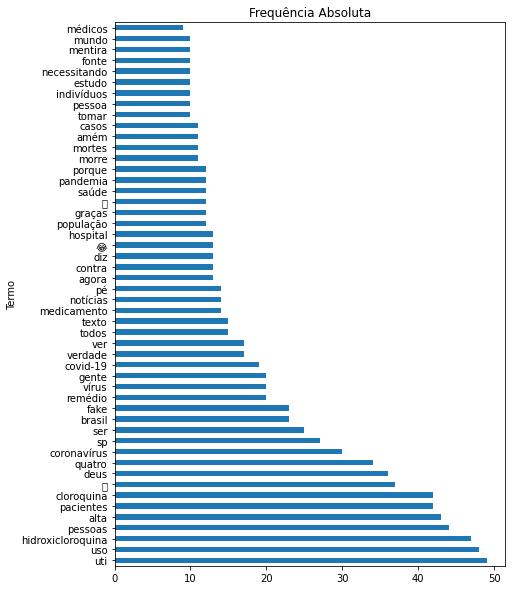

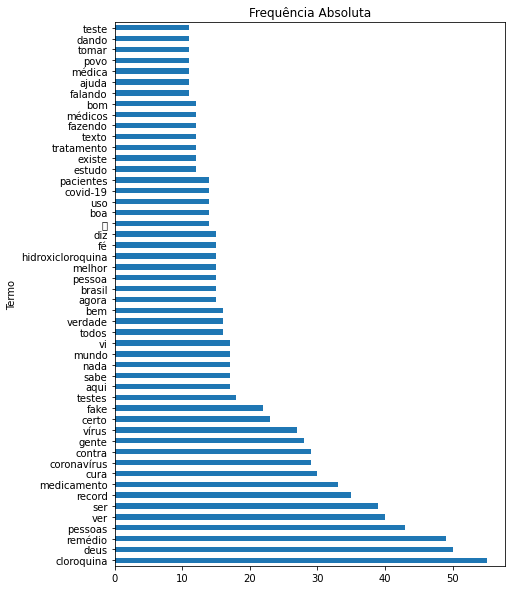

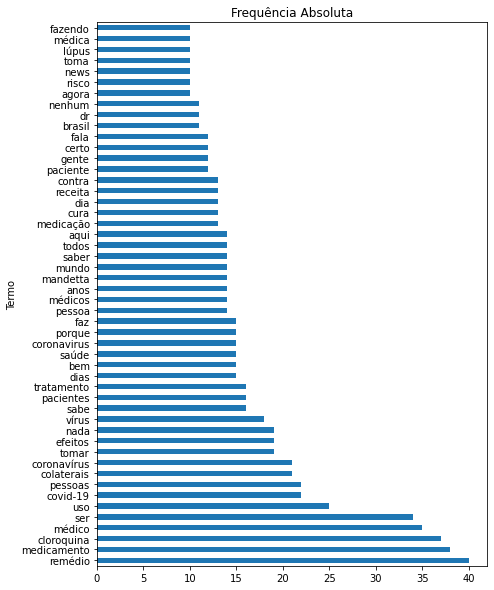

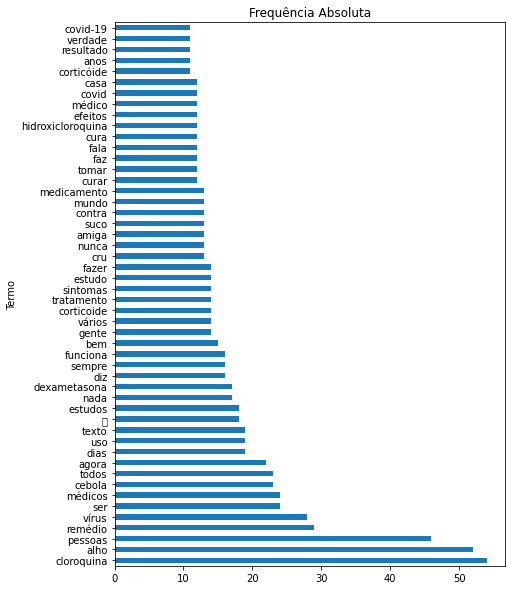

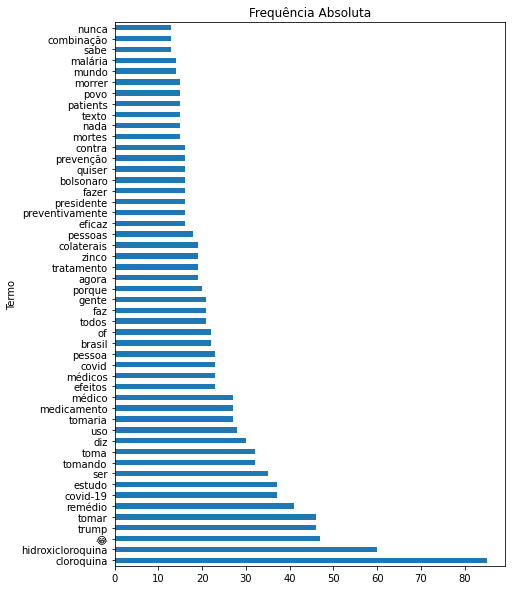

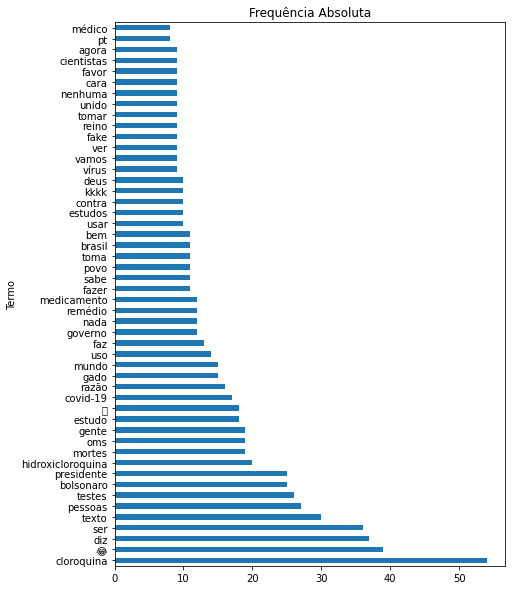

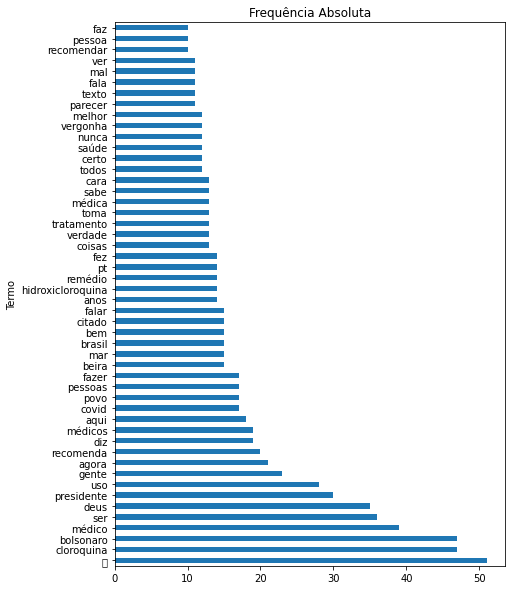

In [15]:
# plotando o primeiro gráfico!
freq1.head(50).plot(kind='barh', x=0, y=1, title='Frequência Absoluta', legend=False, figsize=[7, 10])
freq2.head(50).plot(kind='barh', x=0, y=1, title='Frequência Absoluta', legend=False, figsize=[7, 10])
freq3.head(50).plot(kind='barh', x=0, y=1, title='Frequência Absoluta', legend=False, figsize=[7, 10])
freq4.head(50).plot(kind='barh', x=0, y=1, title='Frequência Absoluta', legend=False, figsize=[7, 10])
freq5.head(50).plot(kind='barh', x=0, y=1, title='Frequência Absoluta', legend=False, figsize=[7, 10])
freq6.head(50).plot(kind='barh', x=0, y=1, title='Frequência Absoluta', legend=False, figsize=[7, 10])
freq7.head(50).plot(kind='barh', x=0, y=1, title='Frequência Absoluta', legend=False, figsize=[7, 10])

## Salvando os dados para futuras explorações
Como os notebooks aparentemente não trocam dados de variáveis entre si —, o jeito é salvar essas tabelas todas em novos arquivos no próprio Drive onde estamos trabalhando.

In [16]:
# salvando os arquivos em CSV no Drive
freq1.to_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/frequencias/freq_relativa1.csv')
freq2.to_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/frequencias/freq_relativa2.csv')
freq3.to_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/frequencias/freq_relativa3.csv')
freq4.to_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/frequencias/freq_relativa4.csv')
freq5.to_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/frequencias/freq_relativa5.csv')
freq6.to_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/frequencias/freq_relativa6.csv')
freq7.to_csv('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/frequencias/freq_relativa7.csv')